In [1]:
import random

# **Pure $\lambda$-Calculus**

[The deatailed script](https://www.mathcha.io/editor/Pvvz5UZ1t7ktL6sZJYp19sZnX9vVserJMEKhJvvMx7)

## **Variables**

The code below models variables.

Using the `natgen()` generator in this code ensures that a fresh variable is returned in response to each constructor call.

## Import dependencies

In [22]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, algorithms, base, creator
import seaborn as sns

sys.path.append('../')
from calculus.term import natgen, Var, Term, Atom, Application, Abstraction
from calculus.strategy import OneStepStrategy, LeftmostOutermostStrategy,\
    LeftmostInnermostStrategy, RightmostInnermostStrategy, \
    RightmostOutermostStrategy, RandomStrategy, MixedStrategy
from calculus.generation import genTerm

In [6]:
UPLIMIT = 60
DOWNLIMIT = 50

LAMBDA_TERM_COUNT = 100

RANDOM_AVERAGE_COUNT = 20

def filterTerms(term):
  return term and DOWNLIMIT < term.verticesNumber < UPLIMIT

def flatten(t):
    return [item for sublist in t for item in sublist]

terms = flatten([list(filter(filterTerms, [genTerm(p, UPLIMIT) for i in range(7000)])) for p in np.arange(0.49, 0.51, 0.02)])

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

stepsLO = list(map(lambda term: term.normalize(LeftmostOutermostStrategy())[1], terms))
print("number of steps to normalize using LO strategy= {}".format(stepsLO))

terms_with_normal_form = []
stepsLO_temp = []
for i, term in enumerate(terms):
  if stepsLO[i] != float('inf'):
    terms_with_normal_form.append(term)
    stepsLO_temp.append(stepsLO[i])
terms = terms_with_normal_form[:LAMBDA_TERM_COUNT]
stepsLO = stepsLO_temp[:LAMBDA_TERM_COUNT]

print(f'number of terms with normal form {len(terms)}')
assert(len(terms) == LAMBDA_TERM_COUNT)

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for term in terms]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

number of lambda terms 257
number of vertices= [57, 52, 51, 53, 51, 53, 59, 52, 56, 57, 52, 56, 55, 57, 52, 55, 58, 51, 53, 53, 56, 58, 51, 52, 55, 58, 56, 54, 56, 57, 52, 58, 55, 54, 55, 52, 58, 53, 59, 55, 55, 51, 52, 52, 56, 59, 53, 55, 59, 57, 53, 59, 53, 53, 51, 59, 51, 59, 59, 57, 52, 54, 59, 56, 55, 58, 59, 58, 59, 58, 55, 57, 51, 53, 56, 55, 51, 53, 52, 52, 54, 59, 59, 53, 58, 52, 53, 58, 56, 58, 54, 59, 55, 58, 55, 58, 51, 55, 56, 54, 53, 57, 58, 56, 54, 51, 52, 52, 51, 59, 55, 53, 58, 58, 58, 54, 52, 57, 53, 51, 55, 57, 58, 57, 51, 56, 58, 59, 54, 58, 56, 59, 55, 57, 52, 59, 53, 51, 56, 51, 58, 59, 53, 55, 56, 54, 55, 51, 58, 59, 51, 57, 58, 56, 53, 52, 53, 52, 59, 51, 55, 54, 59, 52, 59, 52, 51, 55, 57, 52, 57, 58, 51, 51, 55, 52, 59, 59, 56, 59, 55, 51, 51, 57, 55, 52, 58, 51, 55, 57, 54, 54, 57, 51, 54, 55, 52, 52, 55, 58, 58, 51, 53, 57, 59, 51, 55, 54, 51, 56, 57, 55, 58, 53, 59, 57, 53, 54, 59, 54, 52, 52, 58, 51, 51, 56, 54, 51, 56, 52, 54, 53, 57, 51, 57, 54, 56, 51, 

In [8]:
def draw_hist(data):

    steps = [x for x in data if x != float('inf')]

    distributions = get_common_distributions()
    distributions.remove('expon')
    distributions.remove('cauchy')
    f = Fitter(steps, distributions=distributions)
    f.fit()
    summary = f.summary()
    distribution = f.get_best(method='sumsquare_error')

    print('==============')
    print(f'number of not normalized terms: {len(data) - len(steps)}')
    print(summary)
    print(distribution)
    print(f'Norm distribution: {f.fitted_param["norm"]}')
    print('==============')
    plt.xlabel('Number of reduction steps')
    plt.show()

    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()
    mu, sigma = f_ln.fitted_param["norm"]
    print(f'Log Norm distribution params: ({mu}, {sigma}); expected value = {np.e ** (mu + (sigma ** 2) / 2)}')

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.09it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.000767  1801.638795 -1164.047013     inf      0.087045   
chi2             0.006438  1485.731913  -951.248114     inf      0.236832   
exponpow         0.012410  1248.749658  -885.629061     inf      0.442864   
rayleigh         0.020933  3124.920426  -837.947336     inf      0.346060   
powerlaw         0.022540  1110.487002  -825.949752     inf      0.697717   

             ks_pvalue  
lognorm   4.113806e-01  
chi2      2.032585e-05  
exponpow  2.184132e-18  
rayleigh  3.340649e-11  
powerlaw  2.943304e-49  
{'lognorm': {'s': 1.0888413241760309, 'loc': 0.5252624707703644, 'scale': 5.210637582008392}}
Norm distribution: (11.24, 24.916307912690435)


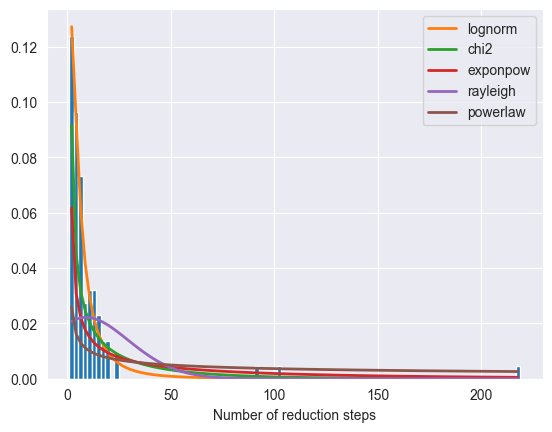

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 34.33it/s]


Log Norm distribution params: (1.801033009591199, 0.950669150179933); expected value = 9.515470294255609


Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.07it/s]


number of not normalized terms: 2
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.188955  1012.979002 -598.864163     inf      0.087751   
gamma            0.190994  1039.376223 -597.812017     inf      0.098265   
rayleigh         0.203050  1206.419506 -596.398378     inf      0.186821   
norm             0.212341  1278.094212 -592.013956     inf      0.156967   
exponpow         0.212695   996.624687 -587.265563     inf      0.131993   

          ks_pvalue  
lognorm    0.413669  
gamma      0.281525  
rayleigh   0.001815  
norm       0.014164  
exponpow   0.059872  
{'lognorm': {'s': 0.6323352341356656, 'loc': 0.514180596561211, 'scale': 8.556700044319092}}
Norm distribution: (10.96938775510204, 7.346322253043651)


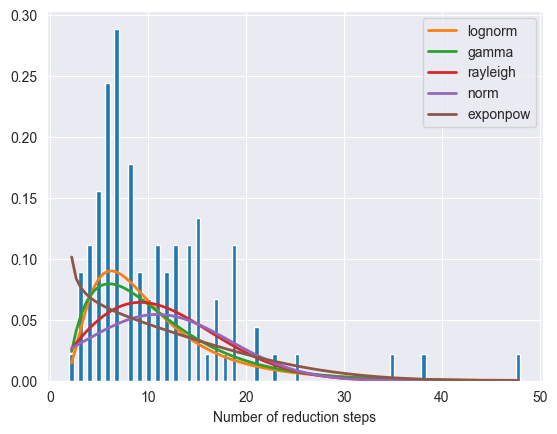

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 32.25it/s]


Log Norm distribution params: (2.216462129699078, 0.5905907539370627); expected value = 10.922892858518589


Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.18it/s]


number of not normalized terms: 3
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.005888  1356.353446 -928.099582     inf      0.054928   
gamma            0.008820  1464.824457 -888.904341     inf      0.088706   
chi2             0.009278  1509.663600 -883.991824     inf      0.094795   
exponpow         0.016648  1168.429898 -827.282994     inf      0.192231   
powerlaw         0.023710  1037.058316 -792.982403     inf      0.330574   

             ks_pvalue  
lognorm   9.158992e-01  
gamma     4.065023e-01  
chi2      3.271943e-01  
exponpow  1.296021e-03  
powerlaw  6.023194e-10  
{'lognorm': {'s': 1.0460607242244762, 'loc': 1.6669927886798965, 'scale': 6.249519323548071}}
Norm distribution: (12.694845360824742, 15.66999971140613)


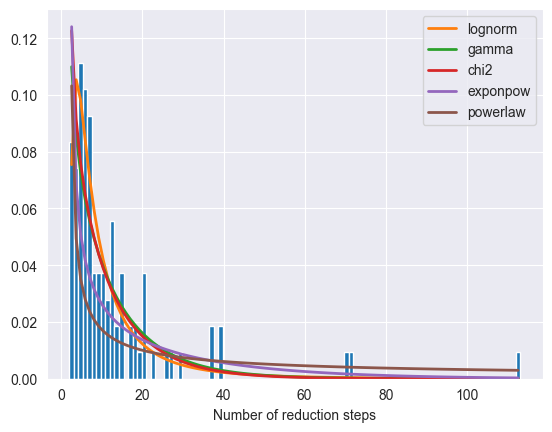

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 40.10it/s]

Log Norm distribution params: (2.156831933377482, 0.7983518560658988); expected value = 11.887825110308857


In [9]:
draw_hist(stepsLO)
draw_hist(stepsRI)
draw_hist(stepsRand)

In [11]:
results = []
values = list(range(0, 101, 5))
for p_lo in values:
  p = (p_lo / 100, 1 - p_lo / 100)
  steps = [sum([term.normalize(MixedStrategy([LeftmostOutermostStrategy(), RightmostInnermostStrategy()], p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for term in terms]
  steps = list(filter(lambda x: x != float('inf'), steps))

  distributions = get_common_distributions()
  distributions.remove('expon')
  f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
  f_ln.fit()

  mu, sigma = f_ln.fitted_param["norm"]
  result = np.e ** (mu + (sigma ** 2) / 2)
  results.append(result)

plt.plot(values, results)
plt.xlabel('p_LO')
plt.ylabel('Expected number of steps')
plt.show()

KeyboardInterrupt: 

In [14]:
def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
                        halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.19it/s]


expected number of steps to normalize using Mixed strategy= 9.874090870231269


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.15it/s]


expected number of steps to normalize using Mixed strategy= 10.95867855039437


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.57it/s]


expected number of steps to normalize using Mixed strategy= 11.288201106512261


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.28it/s]


expected number of steps to normalize using Mixed strategy= 10.348694171016557


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.89it/s]


expected number of steps to normalize using Mixed strategy= 9.734282548116358


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.44it/s]


expected number of steps to normalize using Mixed strategy= 9.785062565821812


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.05it/s]


expected number of steps to normalize using Mixed strategy= 10.001358976293375


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 51.12it/s]


expected number of steps to normalize using Mixed strategy= 10.465875111366998


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.68it/s]


expected number of steps to normalize using Mixed strategy= 9.779694556447197


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.47it/s]


expected number of steps to normalize using Mixed strategy= 10.472672537636193


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.90it/s]


expected number of steps to normalize using Mixed strategy= 9.701800063418034


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 47.61it/s]


expected number of steps to normalize using Mixed strategy= 10.710472184069664


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 44.54it/s]


expected number of steps to normalize using Mixed strategy= 9.774028020645922


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 51.12it/s]


expected number of steps to normalize using Mixed strategy= 11.696141855883841


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 44.77it/s]


expected number of steps to normalize using Mixed strategy= 10.454240129612003


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.95it/s]


expected number of steps to normalize using Mixed strategy= 9.571421297463266


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.60it/s]


expected number of steps to normalize using Mixed strategy= 9.834633247468208


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.91it/s]


expected number of steps to normalize using Mixed strategy= 9.570316669576663


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.47it/s]


expected number of steps to normalize using Mixed strategy= 10.35200056335512


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.62it/s]


expected number of steps to normalize using Mixed strategy= 11.781866119861558
gen	nevals	min    	avg    
0  	20    	9.57032	10.3078


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.81it/s]


expected number of steps to normalize using Mixed strategy= 9.555424205890294


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.24it/s]


expected number of steps to normalize using Mixed strategy= 9.884730990358293


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 44.11it/s]


expected number of steps to normalize using Mixed strategy= 10.46315498685134


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.34it/s]


expected number of steps to normalize using Mixed strategy= 9.57897991441987


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.13it/s]


expected number of steps to normalize using Mixed strategy= 9.571558201210703


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.26it/s]


expected number of steps to normalize using Mixed strategy= 9.848486504989069


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.97it/s]


expected number of steps to normalize using Mixed strategy= 9.6023210244943


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 45.71it/s]


expected number of steps to normalize using Mixed strategy= 10.290261312149008


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.47it/s]


expected number of steps to normalize using Mixed strategy= 9.74573131768253


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 44.33it/s]


expected number of steps to normalize using Mixed strategy= 10.185885760039177


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.38it/s]


expected number of steps to normalize using Mixed strategy= 10.452043265714513


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 44.77it/s]


expected number of steps to normalize using Mixed strategy= 10.511116659369389


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.85it/s]


expected number of steps to normalize using Mixed strategy= 11.128475750576586


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.66it/s]


expected number of steps to normalize using Mixed strategy= 9.757873928239073


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 44.54it/s]


expected number of steps to normalize using Mixed strategy= 10.465281261972358


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.85it/s]


expected number of steps to normalize using Mixed strategy= 9.770632509110163
1  	16    	9.55542	13.0254


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.13it/s]


expected number of steps to normalize using Mixed strategy= 9.591346681499791


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.44it/s]


expected number of steps to normalize using Mixed strategy= 10.310917485349748


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.81it/s]


expected number of steps to normalize using Mixed strategy= 9.584404912645972


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.29it/s]


expected number of steps to normalize using Mixed strategy= 10.401936495034235


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.64it/s]


expected number of steps to normalize using Mixed strategy= 9.778728648863389


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.28it/s]


expected number of steps to normalize using Mixed strategy= 9.776104868292094


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.34it/s]


expected number of steps to normalize using Mixed strategy= 9.693631600037353


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.44it/s]


expected number of steps to normalize using Mixed strategy= 9.801235175786381


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.05it/s]


expected number of steps to normalize using Mixed strategy= 9.842184639782348


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.95it/s]


expected number of steps to normalize using Mixed strategy= 9.584037719487355


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 44.77it/s]


expected number of steps to normalize using Mixed strategy= 10.42952308738868


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.13it/s]


expected number of steps to normalize using Mixed strategy= 9.560863812318958


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.78it/s]


expected number of steps to normalize using Mixed strategy= 9.565779149757175


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.60it/s]


expected number of steps to normalize using Mixed strategy= 9.86478071604055


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.35it/s]


expected number of steps to normalize using Mixed strategy= 9.806049703979987


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.12it/s]


expected number of steps to normalize using Mixed strategy= 9.824253616086102
2  	16    	9.55542	11.9002


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.95it/s]


expected number of steps to normalize using Mixed strategy= 9.799856373999589


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.49it/s]


expected number of steps to normalize using Mixed strategy= 9.564719644920418


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.34it/s]


expected number of steps to normalize using Mixed strategy= 9.594468268957003


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.17it/s]


expected number of steps to normalize using Mixed strategy= 9.561693272833695


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 44.32it/s]


expected number of steps to normalize using Mixed strategy= 9.804860554675436


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.03it/s]


expected number of steps to normalize using Mixed strategy= 9.590711090864135


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.12it/s]


expected number of steps to normalize using Mixed strategy= 9.523755087386395


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.64it/s]


expected number of steps to normalize using Mixed strategy= 9.73815075428865


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.33it/s]


expected number of steps to normalize using Mixed strategy= 9.578442054929896


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 47.36it/s]


expected number of steps to normalize using Mixed strategy= 10.228823476852924


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.96it/s]


expected number of steps to normalize using Mixed strategy= 9.553367602093072


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 46.14it/s]


expected number of steps to normalize using Mixed strategy= 10.173649474253331


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.18it/s]


expected number of steps to normalize using Mixed strategy= 9.586401958442197


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 41.66it/s]


expected number of steps to normalize using Mixed strategy= 9.695663758883923


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.77it/s]


expected number of steps to normalize using Mixed strategy= 9.576976379660953


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.29it/s]


expected number of steps to normalize using Mixed strategy= 9.565061710348921
3  	16    	9.55542	13.5714


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.26it/s]


expected number of steps to normalize using Mixed strategy= 9.759949536673323


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.48it/s]


expected number of steps to normalize using Mixed strategy= 9.563990354894052


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.72it/s]


expected number of steps to normalize using Mixed strategy= 9.563380046850279


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.13it/s]


expected number of steps to normalize using Mixed strategy= 9.572909461837112


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 44.99it/s]


expected number of steps to normalize using Mixed strategy= 10.240758388831768


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.47it/s]


expected number of steps to normalize using Mixed strategy= 9.672147986273053


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.29it/s]


expected number of steps to normalize using Mixed strategy= 9.5744303034381


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.62it/s]


expected number of steps to normalize using Mixed strategy= 9.563106931434007


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.29it/s]


expected number of steps to normalize using Mixed strategy= 9.547351899083784


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 39.11it/s]


expected number of steps to normalize using Mixed strategy= 9.558111232661714


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.96it/s]


expected number of steps to normalize using Mixed strategy= 9.587589243772683


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 43.03it/s]


expected number of steps to normalize using Mixed strategy= 9.831251372061026


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.78it/s]


expected number of steps to normalize using Mixed strategy= 9.595415679901931


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.97it/s]


expected number of steps to normalize using Mixed strategy= 9.575822975411516


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 42.64it/s]


expected number of steps to normalize using Mixed strategy= 9.698590343499223


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.97it/s]


expected number of steps to normalize using Mixed strategy= 9.549126975665297
4  	16    	9.54735	9.64089


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.62it/s]


expected number of steps to normalize using Mixed strategy= 9.595268570912664


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.94it/s]


expected number of steps to normalize using Mixed strategy= 9.581693820367972


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.73it/s]


expected number of steps to normalize using Mixed strategy= 9.563136688159016


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.31it/s]


expected number of steps to normalize using Mixed strategy= 9.573915100585896


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.43it/s]


expected number of steps to normalize using Mixed strategy= 9.572449115067347


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.97it/s]


expected number of steps to normalize using Mixed strategy= 9.575030701306265


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.29it/s]


expected number of steps to normalize using Mixed strategy= 9.55847046226928


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.47it/s]


expected number of steps to normalize using Mixed strategy= 9.558951136483865


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 40.17it/s]


expected number of steps to normalize using Mixed strategy= 9.680771221871387


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.45it/s]


expected number of steps to normalize using Mixed strategy= 9.547432071495916


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.98it/s]


expected number of steps to normalize using Mixed strategy= 9.562482645592583


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.97it/s]


expected number of steps to normalize using Mixed strategy= 9.56153205446272


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.09it/s]


expected number of steps to normalize using Mixed strategy= 9.543900336177282


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.09it/s]


expected number of steps to normalize using Mixed strategy= 9.73884680244146


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 34.47it/s]


expected number of steps to normalize using Mixed strategy= 9.552674414471968


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.88it/s]


expected number of steps to normalize using Mixed strategy= 9.589790626631078
5  	16    	9.5439 	9.61261


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.28it/s]


expected number of steps to normalize using Mixed strategy= 9.56525034460791


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.51it/s]


expected number of steps to normalize using Mixed strategy= 9.537981069914997


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.97it/s]


expected number of steps to normalize using Mixed strategy= 9.561626207839087


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.65it/s]


expected number of steps to normalize using Mixed strategy= 9.537848910770098


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.33it/s]


expected number of steps to normalize using Mixed strategy= 9.554289279921665


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.71it/s]


expected number of steps to normalize using Mixed strategy= 9.550685033960619


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.29it/s]


expected number of steps to normalize using Mixed strategy= 9.563622150979812


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.37it/s]


expected number of steps to normalize using Mixed strategy= 9.544647219176731


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.02it/s]


expected number of steps to normalize using Mixed strategy= 9.541651169131775


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.34it/s]


expected number of steps to normalize using Mixed strategy= 9.561506212735505


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.48it/s]


expected number of steps to normalize using Mixed strategy= 9.525181263849936


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.03it/s]


expected number of steps to normalize using Mixed strategy= 9.556058078949631


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.15it/s]


expected number of steps to normalize using Mixed strategy= 9.557762948506628


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 31.57it/s]


expected number of steps to normalize using Mixed strategy= 9.551431358081643


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 35.92it/s]


expected number of steps to normalize using Mixed strategy= 9.577931382769052


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.97it/s]


expected number of steps to normalize using Mixed strategy= 9.555930634091807
6  	16    	9.53785	9.58236


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.34it/s]


expected number of steps to normalize using Mixed strategy= 9.5601611350769


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.49it/s]


expected number of steps to normalize using Mixed strategy= 9.56363378986867


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.13it/s]


expected number of steps to normalize using Mixed strategy= 9.594742006365765


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.88it/s]


expected number of steps to normalize using Mixed strategy= 9.540813972300695


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.43it/s]


expected number of steps to normalize using Mixed strategy= 9.546088157609828


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.65it/s]


expected number of steps to normalize using Mixed strategy= 9.524874422033095


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.18it/s]


expected number of steps to normalize using Mixed strategy= 9.567218394835724


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.03it/s]


expected number of steps to normalize using Mixed strategy= 9.549821907274113


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.49it/s]


expected number of steps to normalize using Mixed strategy= 9.56909927117217


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.65it/s]


expected number of steps to normalize using Mixed strategy= 9.533437609847184


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 38.45it/s]


expected number of steps to normalize using Mixed strategy= 9.558058184829152


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.25it/s]


expected number of steps to normalize using Mixed strategy= 9.564684336443907


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.49it/s]


expected number of steps to normalize using Mixed strategy= 9.575205404796932


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 36.88it/s]


expected number of steps to normalize using Mixed strategy= 9.568331296831918


Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 37.18it/s]


expected number of steps to normalize using Mixed strategy= 9.558953905649142
7  	15    	9.52487	10.2829
- Best solution is: 
p =  [0.9752890222859242, 0.0020266826909067504, 0.000625975227199837, 0.003844114986301134]


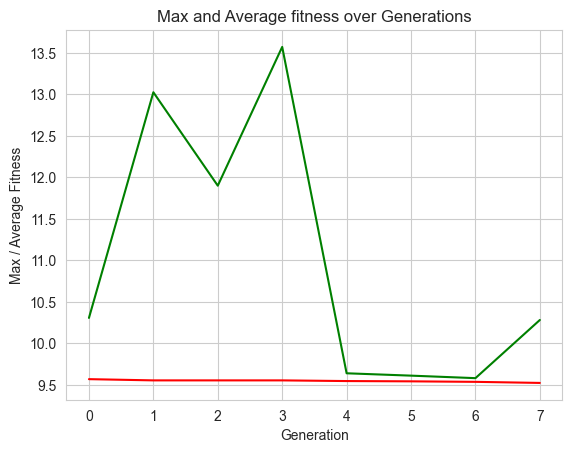

In [16]:
STRATEGIES = [LeftmostOutermostStrategy(), RightmostInnermostStrategy(), LeftmostInnermostStrategy(), RightmostOutermostStrategy(), RandomStrategy()]

BOUNDS_LOW =  [0.1, 0.0, 0.0,  0.0]
BOUNDS_HIGH = [1.0, 1.0, 1.0, 1.0,]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.9   # probability for crossover
P_MUTATION = 0.3    # probability for mutating an individual
MAX_GENERATIONS = 7
HALL_OF_FAME_SIZE = 4
CROWDING_FACTOR = 10  # crowding factor for crossover and mutation

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# define the hyperparameter attributes individually:
for i in range(NUM_OF_PARAMS):
    # "hyperparameter_0", "hyperparameter_1", ...
    toolbox.register("hyperparameter_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched:
hyperparameters = ()
for i in range(NUM_OF_PARAMS):
    hyperparameters = hyperparameters + (toolbox.__getattribute__("hyperparameter_" + str(i)),)

# create the individual operator to fill up an Individual instance:
def individual_creator() -> creator.Individual:
  indv = [0 for _ in range(NUM_OF_PARAMS)]
  for i in range(NUM_OF_PARAMS):
    indv[i] = random.uniform(BOUNDS_LOW[i], 1 - sum(indv))
  return creator.Individual(indv)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, individual_creator)

# fitness calculation
def fitness(individual):
    p = individual.copy()
    p.append(max(0, 1 - sum(individual)))
    steps = [sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for term in terms]
    steps = list(filter(lambda x: x != float('inf'), steps))

    distributions = get_common_distributions()
    distributions.remove('expon')
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    print("expected number of steps to normalize using Mixed strategy= {}".format(result))
    if 1 - sum(individual) < 0:
      result += 100 * (sum(individual) - 1)
    return result,
toolbox.register("evaluate", fitness)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR, indpb=1.0 / NUM_OF_PARAMS)

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = eaSimpleWithElitism(population,
                                          toolbox,
                                          cxpb=P_CROSSOVER,
                                          mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats,
                                          halloffame=hof,
                                          verbose=True)

# print best solution found:
print("- Best solution is: ")
print("p = ", hof.items[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 29.08it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.001148  1785.020948 -1123.635767     inf      0.083772   
chi2             0.005813  1601.142013  -961.471987     inf      0.208310   
exponpow         0.012690  1257.222359  -883.393281     inf      0.413331   
rayleigh         0.021799  3092.131270  -833.894981     inf      0.339445   
powerlaw         0.022654  1110.190869  -825.443508     inf      0.677332   

             ks_pvalue  
lognorm   4.594441e-01  
chi2      2.768614e-04  
exponpow  5.630784e-16  
rayleigh  8.740847e-11  
powerlaw  5.933336e-46  
{'lognorm': {'s': 1.0903879787390873, 'loc': 0.5550359743466726, 'scale': 5.2121828862607265}}
Norm distribution: (11.230999999999996, 24.477339295764974)


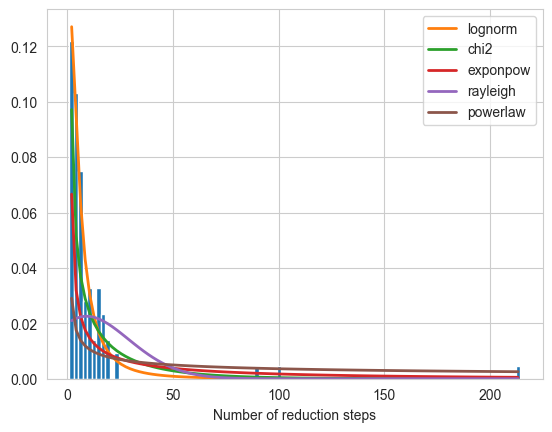

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.84it/s]

Log Norm distribution params: (1.8087778182138032, 0.9461156207014456); expected value = 9.548128837808447


In [18]:
p = hof.items[0]
p.append(max(0, 1 - sum(p)))
MixedStrategySteps = [sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for term in terms]
draw_hist(MixedStrategySteps)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.14it/s]


number of not normalized terms: 0
          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm          0.001132  1795.436298 -1125.036068     inf      0.084478   
chi2             0.008226  1389.135544  -926.750752     inf      0.286520   
exponpow         0.012337  1258.132080  -886.220664     inf      0.419069   
rayleigh         0.021446  3112.653381  -835.527623     inf      0.341523   
powerlaw         0.023046  1108.932082  -823.726252     inf      0.696216   

             ks_pvalue  
lognorm   4.488298e-01  
chi2      9.246250e-08  
exponpow  1.984596e-16  
rayleigh  6.476280e-11  
powerlaw  5.233949e-49  
{'lognorm': {'s': 1.088611160920677, 'loc': 0.5388817196718727, 'scale': 5.227331558667071}}
Norm distribution: (11.261499999999998, 24.768837129546476)


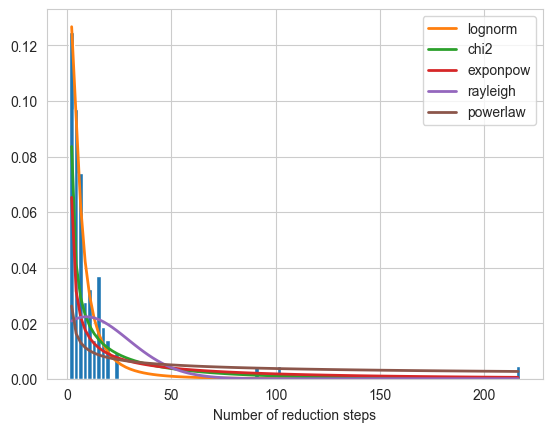

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 34.18it/s]

Log Norm distribution params: (1.8071159672953387, 0.9482410469807409); expected value = 9.55148374969667


In [19]:
p =  [0.98, 0.005, 0.005, 0.005, 0.005]
steps = [sum([term.normalize(MixedStrategy(STRATEGIES, p))[1] for i in range(RANDOM_AVERAGE_COUNT)]) / RANDOM_AVERAGE_COUNT for term in terms]
draw_hist(steps)

In [20]:
def draw_2d_distribution(ax, x, y, xlabel, ylabel):
    ax.scatter(x, y, color='blue')
    ax.set(title = 'Distribution of ' + xlabel.lower() + '-' + ylabel.lower(),
           xlabel = xlabel,
           ylabel = ylabel)
    ax.legend(prop={'size': 10})

def draw_2d_strategy_distribution(ax, x, y, xlabel, ylabel):
    x = list(map(lambda v: -1 if v == float('inf') else v, x))
    y = list(map(lambda v: -1 if v == float('inf') else v, y))
    greater = list(zip(*list(filter(lambda z: z[0] >= z[1] and z[0] != -1 and z[1] != -1, zip(x, y)))))
    less = list(zip(*list(filter(lambda z: z[0] < z[1] and z[0] != -1 and z[1] != -1, zip(x, y)))))
    inf_x  = list(zip(*list(filter(lambda z: z[0] == -1 and z[1] != -1, zip(x, y)))))
    inf_y  = list(zip(*list(filter(lambda z: z[0] != -1 and z[1] == -1, zip(x, y)))))
    inf_xy  = list(zip(*list(filter(lambda z: z[0] == -1 and z[1] == -1, zip(x, y)))))
    ax.scatter(greater[0], greater[1], color='blue', label='{} <= {}'.format(ylabel, xlabel))
    ax.scatter(less[0], less[1], color='red', label='{} < {}'.format(xlabel, ylabel))
    if inf_x:
      ax.scatter(inf_x[0], inf_x[1], color='lime', label="{} doesn't normalize".format(xlabel))
    if inf_y:
      ax.scatter(inf_y[0], inf_y[1], color='yellow', label="{} dooesn't normalize".format(ylabel))
    if inf_xy:
      ax.scatter(inf_xy[0], inf_xy[1], color='orange', label="Both strategies don't normalize")
    ax.set(title = 'Distribution of ' + xlabel.lower() + '-' + ylabel.lower(),
           xlabel = xlabel,
           ylabel = ylabel)
    ax.legend(prop={'size': 10})

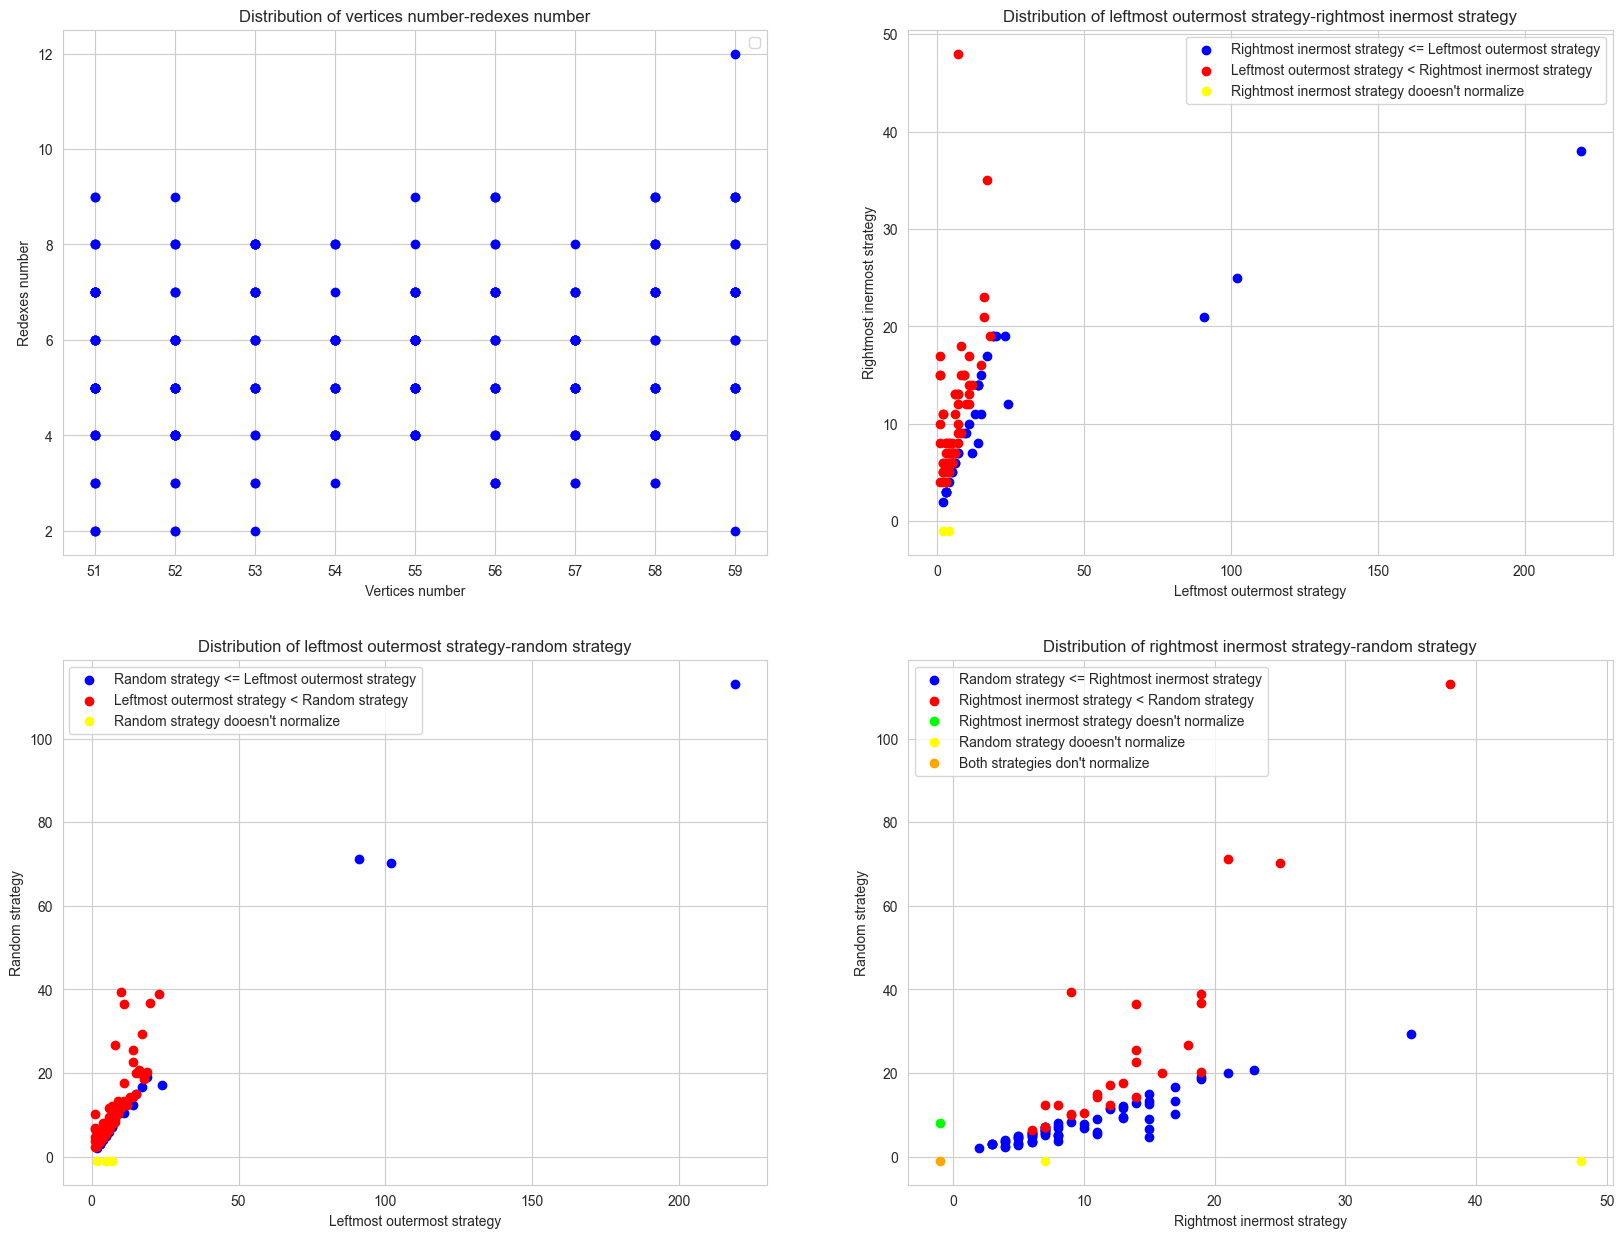

In [21]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
ax0, ax1, ax2, ax3 = axes.flatten()
draw_2d_distribution(ax0, countVertices, countRedexes, 'Vertices number', 'Redexes number')
draw_2d_strategy_distribution(ax1, stepsLO, stepsRI, 'Leftmost outermost strategy', 'Rightmost inermost strategy')
draw_2d_strategy_distribution(ax2, stepsLO, stepsRand, 'Leftmost outermost strategy', 'Random strategy')
draw_2d_strategy_distribution(ax3, stepsRI, stepsRand, 'Rightmost inermost strategy', 'Random strategy')
plt.show()

In [23]:
def draw_plot(x, y, z, q, labels, colors):
  x = list(map(lambda v: -1 if v == float('inf') else v, x))
  y = list(map(lambda v: -1 if v == float('inf') else v, y))
  z = list(map(lambda v: -1 if v == float('inf') else v, z))
  q = list(map(lambda v: -1 if v == float('inf') else v, q))

  data = pd.DataFrame(zip(x, y, z, q), columns = labels)
  ax0 = data.plot(figsize=(20,10), kind='bar', color=colors)
  ax0.set(title = 'Distribution of number of reduction steps for each term',
          xlabel = 'Term index',
          ylabel = 'Number of reduction steps')
  ax0.legend(prop={'size': 10})
  plt.show()
  return ax0

<AxesSubplot: title={'center': 'Distribution of number of reduction steps for each term'}, xlabel='Term index', ylabel='Number of reduction steps'>

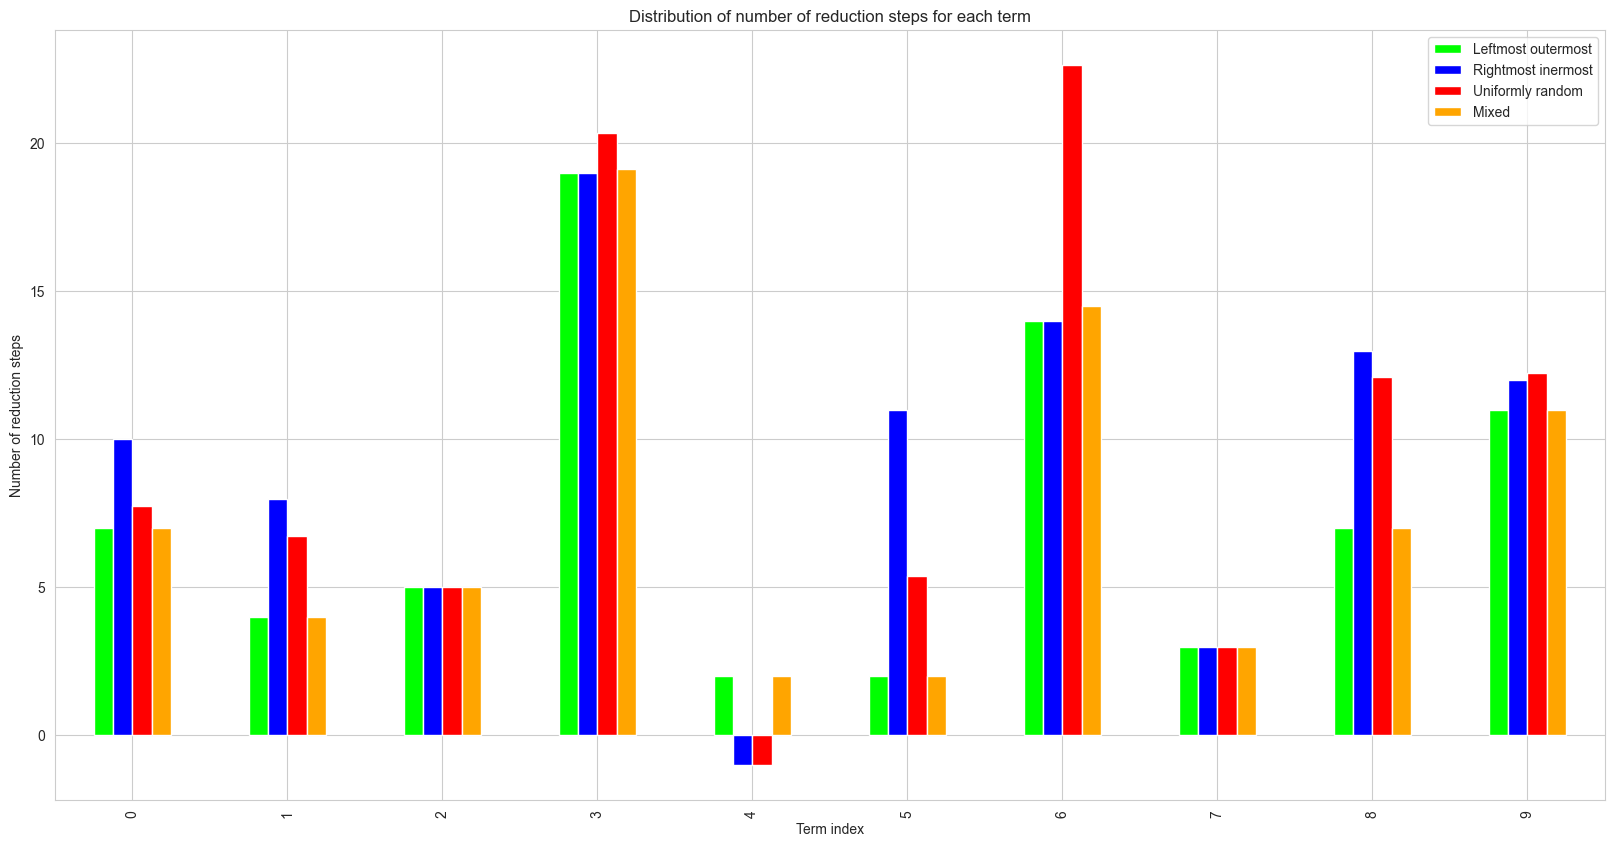

In [24]:
colors = ['lime', 'blue', 'red', 'orange']
labels = ['Leftmost outermost', 'Rightmost inermost', 'Uniformly random', 'Mixed']
n = 20
draw_plot(stepsLO[10:n], stepsRI[10:n], stepsRand[10:n], MixedStrategySteps[10:n],  labels, colors)

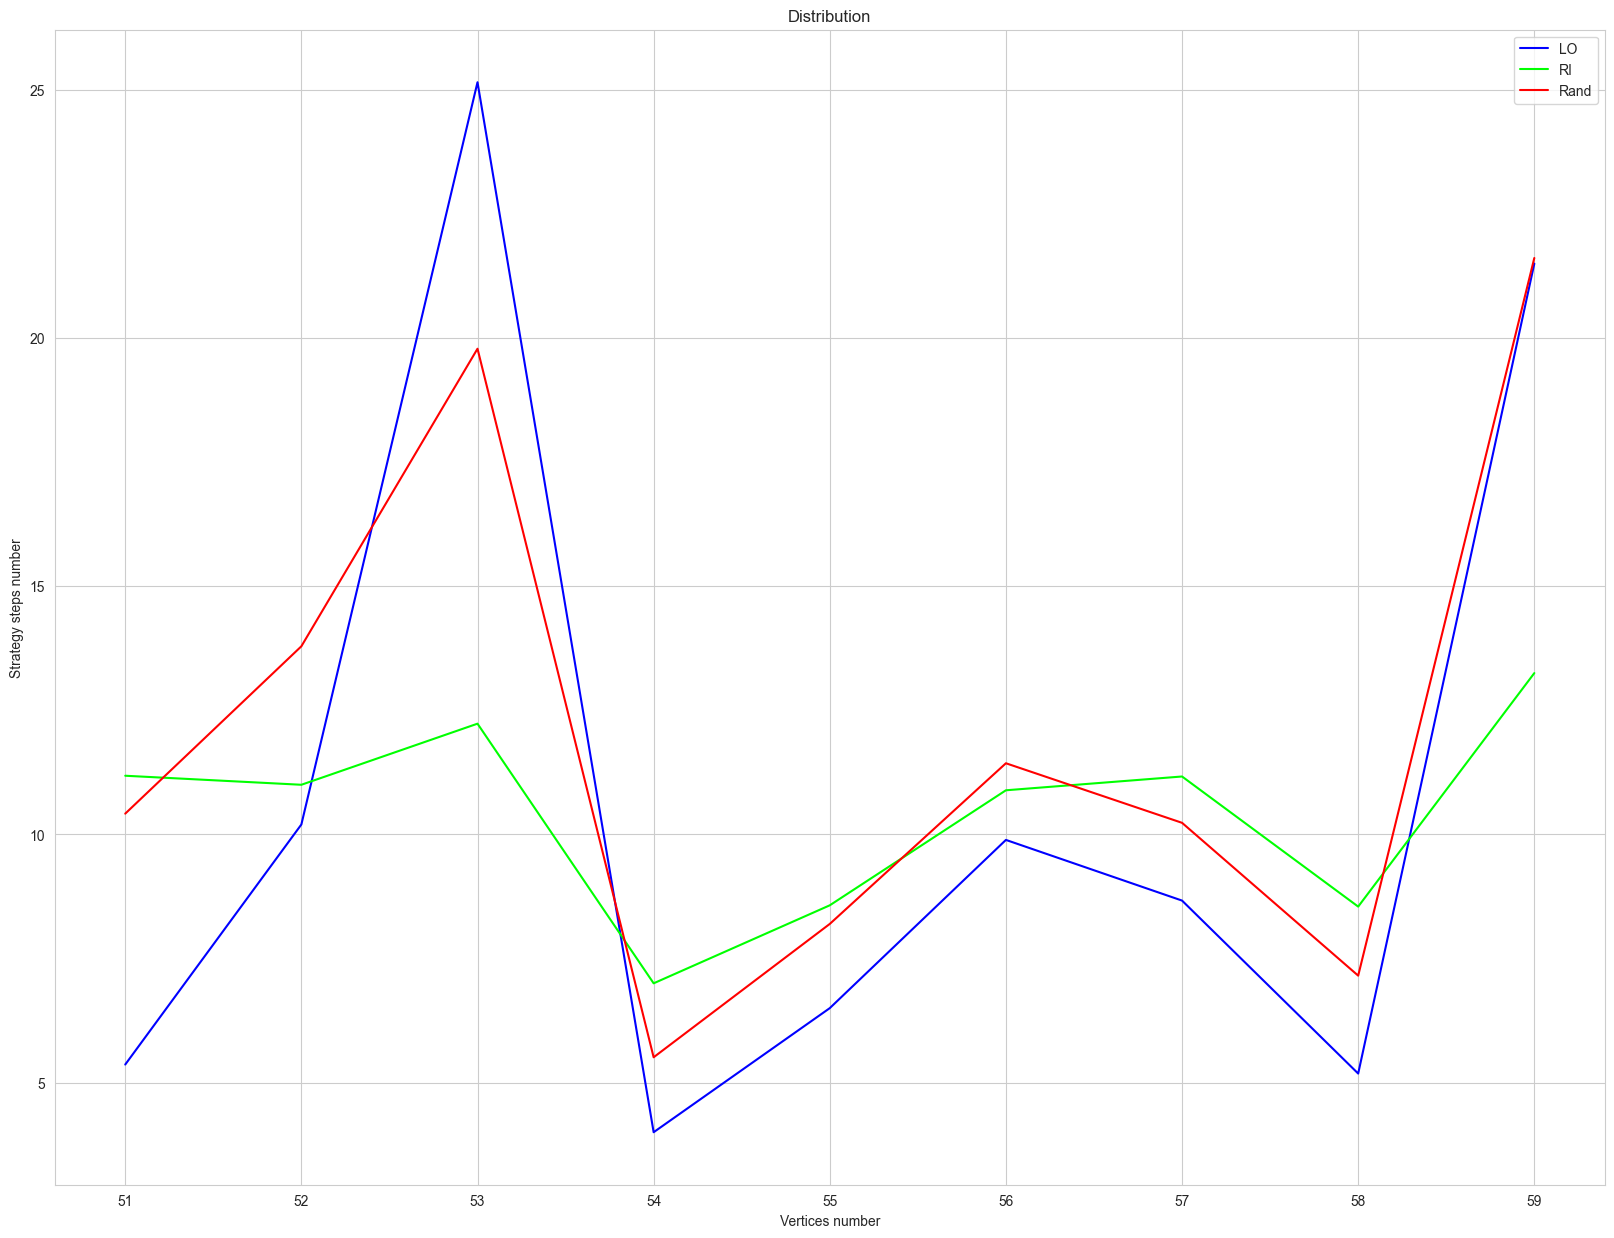

In [25]:
terms_dict = {i: [] for i in range(DOWNLIMIT, UPLIMIT)}

for i, term in enumerate(terms):
  terms_dict[term.verticesNumber].append((term, {'LO': stepsLO[i], 'RI': stepsRI[i], 'Rand': stepsRand[i]}))

average_term_data = dict()
for verticesNumber, data in terms_dict.items():
  data_without_inf = [d[1] for d in data if d[1]['LO'] != float('inf') and d[1]['RI'] != float('inf') and d[1]['Rand'] != float('inf')]
  avgLO, avgRI, avgRand = 0, 0, 0
  for d in data_without_inf:
    avgLO += d['LO']
    avgRI += d['RI']
    avgRand += d['Rand']

  count = len(data_without_inf)
  if count != 0:
    average_term_data[verticesNumber] = {'LO': avgLO / count, 'RI': avgRI / count, 'Rand': avgRand / count}

plt.figure(figsize=(20, 15))
ax = plt.gca()
ax.plot(list(average_term_data.keys()), [data['LO'] for i, data in average_term_data.items()], color='blue', label='LO')
ax.plot(list(average_term_data.keys()), [data['RI'] for i, data in average_term_data.items()], color='lime', label='RI')
ax.plot(list(average_term_data.keys()), [data['Rand'] for i, data in average_term_data.items()], color='red', label='Rand')
ax.set(title = 'Distribution',
        xlabel = 'Vertices number',
        ylabel = 'Strategy steps number')
ax.legend(prop={'size': 10})

plt.show()

## TESTS

In [26]:
x, y, z = Var(), Var(), Var()
X, Z = Atom(x), Atom(z)
XXX = Application(Application(X, X), X)
XZ = Application(X, Z)
T = Application(Abstraction(x, XXX),
                Abstraction(x, Application(Abstraction(y, Z),
                                           XZ
                                          ))
               )

print(T)
for var, item in T._vars.items():
    print("\t{}".format(var), end=": ")
    print(item)

((fun v[4757929] => ((v[4757929] v[4757929]) v[4757929])) (fun v[4757929] => ((fun v[4757930] => v[4757931]) (v[4757929] v[4757931]))))
	v[4757929]: {'free': 0, 'bound': 4}
	v[4757931]: {'free': 2, 'bound': 0}


In [27]:
x, y, z, w, v = Var(), Var(), Var(), Var(), Var()
# (λx.(λy.( ((λz.(y z)) ((λw.w) x)) v )))
lambdaTerm = Abstraction(x,
                        Abstraction(y,
                                    Application(
                                        Application(
                                            Abstraction(z, Application(Atom(y), Atom(z))),
                                            Application(Abstraction(w, Atom(w)), Atom(w))),
                                        Atom(v))))

def testTerm():
  assert(len(lambdaTerm.redexes) == 2)
  assert(lambdaTerm.verticesNumber == 13)

  subterm = Application(Atom(y), Atom(z))
  assert(lambdaTerm.subterm(1) == lambdaTerm)
  assert(lambdaTerm.subterm(6) == subterm)
  assert(lambdaTerm.setSubterm(1, subterm) == subterm)

  assert(lambdaTerm._updateBoundVariables().verticesNumber == lambdaTerm.verticesNumber)
  assert(len(lambdaTerm._updateBoundVariables().redexes) == len(lambdaTerm.redexes))

  strategy = LeftmostOutermostStrategy()
  assert(len(lambdaTerm._betaConversion(strategy).redexes) == 1)
  assert(lambdaTerm._betaConversion(strategy).verticesNumber == 10)

  assert(len(lambdaTerm.normalize(strategy)[0].redexes) == 0)
  assert(lambdaTerm.normalize(strategy)[1] == 2)


def testStrategy():
  strategy = LeftmostOutermostStrategy()
  assert(strategy.redexIndex(lambdaTerm) == 4)

testTerm()
testStrategy()

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.64it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
chi2             0.007258  1594.988727 -928.765440     inf      0.208873   
lognorm          0.007465  1425.005389 -925.986307     inf      0.075794   
exponpow         0.022262  1065.754395 -817.812621     inf      0.359552   
powerlaw         0.025969  1026.721019 -802.566831     inf      0.364177   
rayleigh         0.039182  2146.749453 -766.440265     inf      0.273533   

             ks_pvalue  
chi2      2.881516e-04  
lognorm   5.932946e-01  
exponpow  5.748427e-12  
powerlaw  2.832723e-12  
rayleigh  4.895880e-07  
{'chi2': {'df': 1.2331039971715105, 'loc': 0.9999999999999998, 'scale': 5.345861432552374}}
Norm distribution: (9.141414141414142, 13.663347786969297)


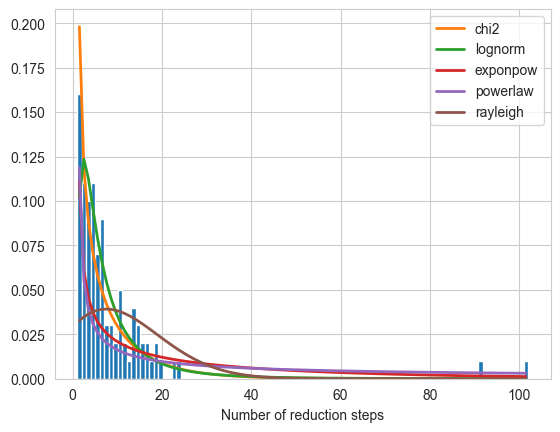

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.77it/s]

Log Norm distribution params: (1.7647901942353883, 0.8840512852925922); expected value = 8.632753639241042


In [28]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail)

In [ ]:
stepsLOWithoutTail = [x for x in stepsLO if x < 150]
draw_hist(stepsLOWithoutTail, './hist-LO-without-tail.png')